### conditional graph 

In [2]:
from typing import TypedDict
from langgraph.graph import StateGraph ,START,END

In [3]:
# created a stateSchema 
class agentstate(TypedDict):
    number1 : int
    number2: int 
    final_number: int
    operation: str

In [4]:
# node function 

def adder(state: agentstate)->agentstate:
    '''this function add two nodes'''
    state['final_number']= state['number1']+state['number2']
    return state
def subtractor(state: agentstate )->agentstate:
    '''this node subtract two nodes '''
    state['final_number']=state['number1']-state['number2']
    return state
def decision_node(state:agentstate)->agentstate:
    if state['operation']=='+':
        return 'addition_operator'
    if state['operation']=='-':
        return 'substractor_operator'

In [5]:
 # desine a graph 
graph= StateGraph(agentstate)

graph.add_node("adder_node",adder)
graph.add_node("subtractor_node",subtractor)
graph.add_node("router",lambda state:state)
graph.add_edge(START,"router")
graph.add_conditional_edges(
    "router",
    decision_node,
    # edge :- node 
    {
        "addition_operator":"adder_node",
        "substractor_operator":"subtractor_node"
    }
)
graph.add_edge('adder_node',END)
graph.add_edge('subtractor_node',END)
app=graph.compile()


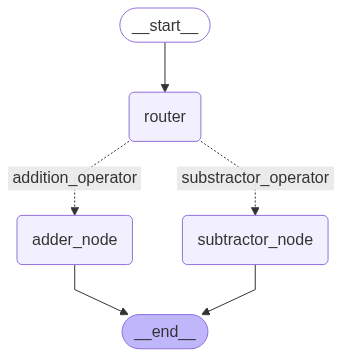

In [6]:

from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))



In [7]:
result=agentstate(number1=1,number2=3,operation="+")

app.invoke(result)

{'number1': 1, 'number2': 3, 'final_number': 4, 'operation': '+'}

In [8]:
# second way 
result2=app.invoke({'operation':"+",'number1':1,'number2':2})
result2

{'number1': 1, 'number2': 2, 'final_number': 3, 'operation': '+'}

### Exercise question use two condiotnal edges 

In [9]:
#  state schema for our exercise
class Agentstate(TypedDict):
    number1:int  
    number2:int  
    number3:int  
    number4:int  
    final_number1:int
    final_number2:int
    operation1:str
    operation2:str

In [29]:
# node function
def adder1 ( state:Agentstate)->Agentstate:
    """"this node add the number """
    state ['final_number1']=state['number1']+ state['number2']
    return state

def subtractor1 ( state:Agentstate)->Agentstate:
    """"this node add the number """
    state ['final_number1']=state['number1']- state['number2']
    return state


#   first decision for router

def decide_next_node1( state: Agentstate)->Agentstate:
    '''decide the next node '''
    if state['operation1']=='+':
        return 'add_operation1'
    elif state['operation1']=='-':
        print('sub1')
        return 'sub1_operation1'


def adder2 (state:Agentstate)->Agentstate:
    ''' second adder node '''
    state['final_number2']=state['number3']+state['number4']
    return state

def subtractor2 (state:Agentstate)->Agentstate:
    ''' second adder node '''
    state['final_number2']=state['number3']-state['number4']
    return state


# second decision for router 
     
def decide_next_node2(state:Agentstate)->Agentstate:
    '''second time decide node'''
    if state['operation2']=='+':
        print('add2')
        return 'add_operation2'
    elif state['operation2']=='-':
        print('sub2') 
        return 'sub_operation2'

            

In [33]:
graph=StateGraph(Agentstate)

# first we have add all the nodes one by one 

graph.add_node('adder_node1',adder1)
graph.add_node('sub_node1',subtractor1)
graph.add_node('router1',lambda state:state)

graph.add_node("adder_node2",adder2)
graph.add_node('sub_node2',subtractor2)
graph.add_node('router2',lambda state:state)

graph.add_edge(START,'router1')

graph.add_conditional_edges(
    "router1",
    decide_next_node1,

    # adge : node format
    {
        'add_operation1':'adder_node1',
        'sub1_operation1':'sub_node1'
    }
)

# now attach node one with node two using egdes because edge are used to connect node one to other node
graph.add_edge('adder_node1','router2')
graph.add_edge('sub_node1','router2')

graph.add_conditional_edges(
    'router2',
    decide_next_node2,
    {
        # edge : node format
        'add_operation2':'adder_node2',
        'sub_operation2':'sub_node2'
    }
    )
graph.add_edge('adder_node2',END)
graph.add_edge('sub_node2',END)
app1=graph.compile()

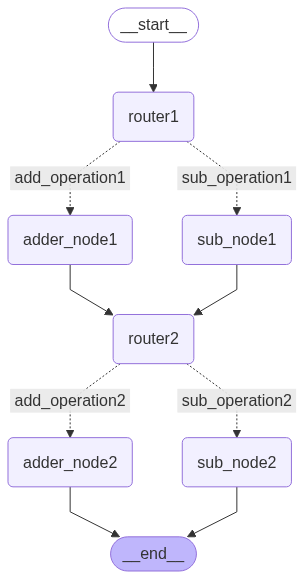

In [25]:
from IPython.display import Image,display
display(Image(app1.get_graph().draw_mermaid_png()))

In [34]:
result3=Agentstate(operation1='-',number1=1,number2=2,number3=3,number4=4,operation2="+",final_number1=0,final_number2=0)


In [35]:
app1.invoke(result3)

sub1
add2


{'number1': 1,
 'number2': 2,
 'number3': 3,
 'number4': 4,
 'final_number1': -1,
 'final_number2': 7,
 'operation1': '-',
 'operation2': '+'}

### third conditional graph for three conditional graph


In [36]:

# stateschema for our second exercise
class graphstate(TypedDict):
    n1:int
    n2:int 
    n3:int 
    n4:int 
    n5:int
    n6:int 
    operation1:str
    operation2:str  
    operation3:str
    finl_nmb1:int
    finl_nmb2:int
    finl_nmb3:int   



In [ ]:
# node function for our third exercise 
def ad1 (state:graphstate)->graphstate:
    '''this node add the number '''
    s
def subt1 (state:graphstate)->graphstate:
def ad2 (state:graphstate)->graphstate:
def subt2 (state:graphstate)->graphstate:
def ad3 (state:graphstate)->graphstate:
def subt3 (state:graphstate)->graphstate:




